## Aproximación trigonométrica

## Parámetros

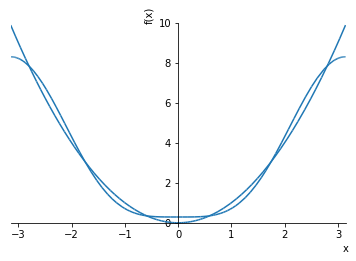

In [8]:
from sympy import fourier_series, pi
from sympy.abc import x
from sympy.plotting import plot

p = plot(x**2, fourier_series(x**2, (x, -pi, pi)).truncate(n=3), (x, -pi, pi))
